# Parabolic Equations in 2D

## 2D Heat Equation (Explicit Scheme): Morten and Mayers (2005). Page 67 forward

We solve the 2D heat equation below using the Explicit scheme and the M shape (Morten and Mayers) as initial data:

\begin{equation}
\dfrac{\partial u}{\partial t} = \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} 
\end{equation}




## Discretization of the 2D Heat Equation

Let the spatial domain be discretized into a uniform grid:

\begin{align*}
x_i = i \, \Delta x, \quad y_j = j \, \Delta y, \quad t^n = n \, \Delta t,
\end{align*}

where:
- $u_{i,j}^n \approx u(x_i, y_j, t^n)$.  
- $\Delta x, \Delta y$ are the grid spacings.  
- $\Delta t$ is the time step.  

The finite-difference approximations are:

- **Time derivative** (forward):
\begin{align*}
\frac{\partial u}{\partial t} \approx \frac{u_{i,j}^{n+1} - u_{i,j}^n}{\Delta t}
\end{align*}

- **Second derivative in x** (central difference):
\begin{align*}
\frac{\partial^2 u}{\partial x^2} \approx \frac{u_{i+1,j}^n - 2u_{i,j}^n + u_{i-1,j}^n}{(\Delta x)^2}
\end{align*}

- **Second derivative in y** (central difference):
\begin{align*}
\frac{\partial^2 u}{\partial y^2} \approx \frac{u_{i,j+1}^n - 2u_{i,j}^n + u_{i,j-1}^n}{(\Delta y)^2}
\end{align*}

---

## The Explicit Scheme 

Substituting into the PDE (Eqn (1)), we have

\begin{align*}
\frac{u_{i,j}^{n+1} - u_{i,j}^n}{\Delta t} =
\frac{u_{i+1,j}^n - 2u_{i,j}^n + u_{i-1,j}^n}{\Delta x^2} +
\frac{u_{i,j+1}^n - 2u_{i,j}^n + u_{i,j-1}^n}{\Delta y^2}.
\end{align*}

Rearranging gives the **explicit scheme**:

\begin{align*}
u_{i,j}^{n+1} =
u_{i,j}^n
+ \lambda_x \left(u_{i+1,j}^n - 2u_{i,j}^n + u_{i-1,j}^n\right)
+ \lambda_y \left(u_{i,j+1}^n - 2u_{i,j}^n + u_{i,j-1}^n\right),
\end{align*}

where

\begin{align*}
\lambda_x = \frac{\Delta t}{(\Delta x)^2}, 
\quad 
\lambda_y = \frac{\Delta t}{(\Delta y)^2}.
\end{align*}

---

### Stability Condition

For stability of the explicit scheme, we must have that

\begin{align*}
\lambda_x + \lambda_y < \dfrac{1}{2}.
\end{align*}


## Implementation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation, PillowWriter, FFMpegWriter

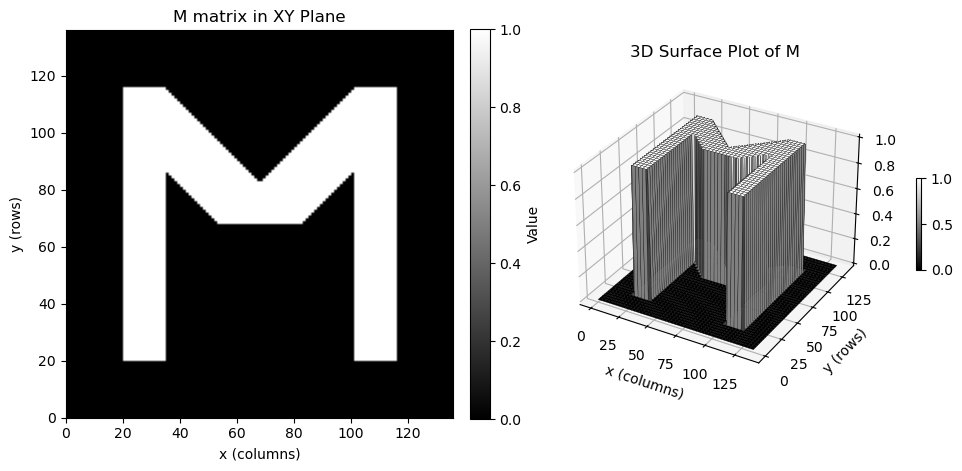

In [2]:
# function that generates the M matrix
def M_matrix(nx=50, ny=50, thickness=3, pad_value=3, m_value=10):

    # Diagonal block
    top_left_block = np.eye(nx-2) * m_value
    for i in range(1, thickness):
        top_left_block += np.diag(np.ones(nx-(i+2)) * m_value,  i)
        top_left_block += np.diag(np.ones(nx-(i+2)) * m_value, -i)

    # Top Left diagonal and vertical stroke
    top_left_block[:, :thickness] = m_value

    # Top Right diagonal and vertical stroke
    top_right_block = top_left_block[:, ::-1]

    # Bottom left vertical strokes
    bottom_left_block = np.zeros((nx-2, ny-2))
    bottom_left_block[:, :thickness] = m_value

    # Bottom right vertical strokes
    bottom_right_block = bottom_left_block[:, ::-1]      

    # Assemble
    top_matrix = np.hstack((top_left_block, top_right_block))
    bottom_matrix = np.hstack((bottom_left_block, bottom_right_block))
    concatenated_matrix = np.vstack((top_matrix, bottom_matrix))

    # Put zeros around the matrix M
    M_shape_matrix = np.pad(concatenated_matrix, pad_width = pad_value, 
                            mode = "constant", constant_values = 0)
    
    return M_shape_matrix[::-1, :]

M_shape = M_matrix(nx=50, ny=50, thickness=15, pad_value=20, m_value=1)

# Prepare mesh for 3D
x = np.arange(M_shape.shape[1])
y = np.arange(M_shape.shape[0])
X, Y = np.meshgrid(x, y)

# Create subplots in 1 row
fig = plt.figure(figsize=(10,5))

# 2D Plot of M
ax1 = fig.add_subplot(1, 2, 1)
im = ax1.imshow(M_shape, cmap="gray", origin="lower",
                extent=[0, M_shape.shape[1], 0, M_shape.shape[0]])
fig.colorbar(im, ax=ax1, fraction=0.046, pad=0.04, label="Value")
ax1.set_title("M matrix in XY Plane")
ax1.set_xlabel("x (columns)")
ax1.set_ylabel("y (rows)")
ax1.set_aspect("equal")

# 3D Plot of M
ax2 = fig.add_subplot(1, 2, 2, projection="3d")
surf = ax2.plot_surface(X, Y, M_shape,
                        cmap="gray", edgecolor="black",
                        linewidth=0.2, antialiased=True)
fig.colorbar(surf, ax=ax2, shrink=0.2, pad=0.1, label=None)
ax2.set_title("3D Surface Plot of M")
ax2.set_xlabel("x (columns)")
ax2.set_ylabel("y (rows)")
ax2.set_zlabel("")

plt.tight_layout()
plt.show()

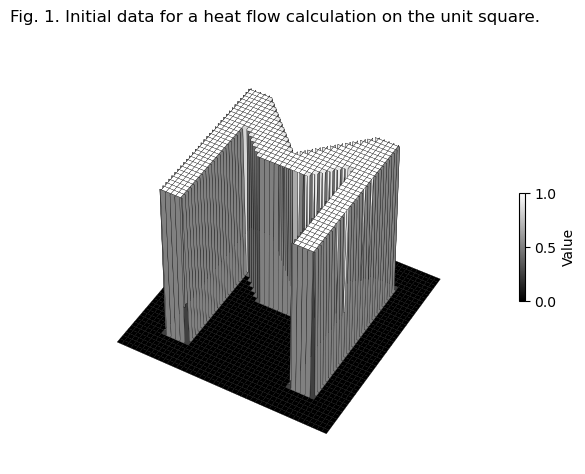

In [3]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection="3d")

surf = ax.plot_surface(X, Y, M_shape,
                       cmap="gray", edgecolor="black",
                       linewidth=0.2, antialiased=True)
ax.view_init(elev=45, azim=-60)
ax.set_axis_off()
ax.set_title("Fig. 1. Initial data for a heat flow calculation on the unit square.")
ax.set_zlabel("Value (matrix entries)")
ax.zaxis.grid(False)
fig.colorbar(surf, shrink=0.2, label="Value")

plt.show()

### Solving the Heat Equation using the M as initial data

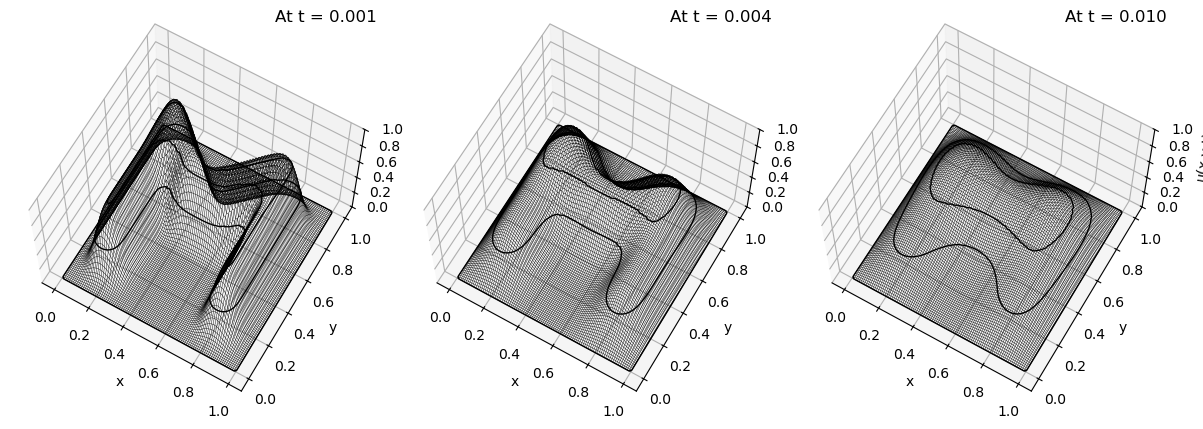

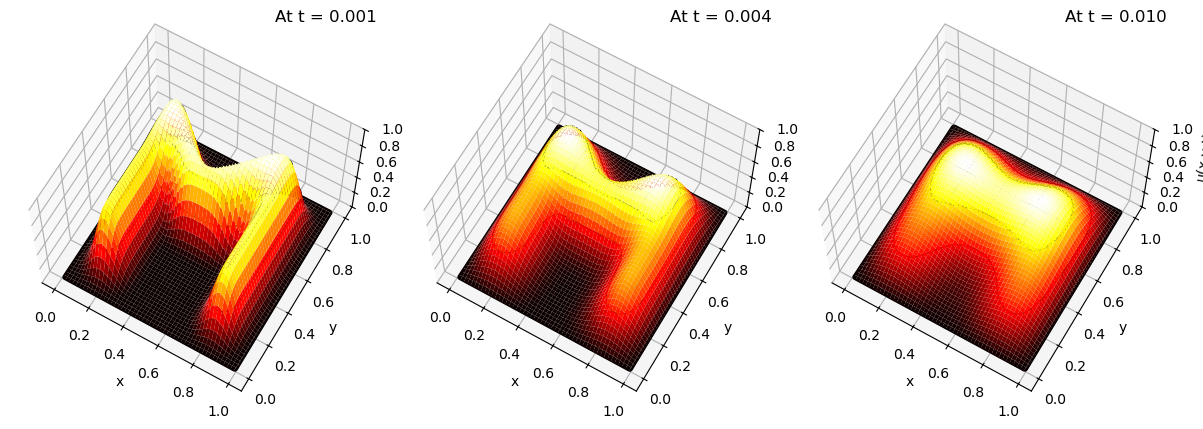

In [4]:
# PDE parameters
Nx, Ny = 100, 100        
Lx, Ly = 1.0, 1.0          
dx = Lx / Nx
dy = Ly / Ny

alpha = 1.0   
# CFL stability condition   
dt = 0.25 * min(dx,dy)**2 / alpha   
timesteps = 500    

# initial condition
u = M_matrix(40, 40, thickness=12, pad_value=12, m_value=1)

# grid
x = np.linspace(0, Lx, Nx)
y = np.linspace(0, Ly, Ny)
X, Y = np.meshgrid(x, y)

# Explicit PDE update step
def solve(u):
    u_new = u.copy()
    u_new[1:-1, 1:-1] = (
        u[1:-1, 1:-1]
        + alpha*dt/dx**2 * (u[2:, 1:-1] - 2*u[1:-1, 1:-1] + u[:-2, 1:-1])
        + alpha*dt/dy**2 * (u[1:-1, 2:] - 2*u[1:-1, 1:-1] + u[1:-1, :-2])
    )
    return u_new

# times we want to capture
times_to_plot = [0.001, 0.004, 0.01]
frames_to_plot = [int(t/dt) for t in times_to_plot]

# run simulation and store snapshots
snapshots = {}
for frame in range(max(frames_to_plot)+1):
    if frame in frames_to_plot:
        snapshots[frame] = u.copy()
    u = solve(u)

# wire plots with the M diffusion 
fig = plt.figure(figsize = (12,4))
for idx, (frame, u_snapshot) in enumerate(snapshots.items(), start = 1):
    ax = fig.add_subplot(1, len(snapshots), idx, projection = "3d")
    
    # wireframe plot
    surf = ax.plot_wireframe(X, Y, u_snapshot, rstride = 1, cstride = 1, 
                             color="black", linewidth=0.3, antialiased=True)
    
    ax.contour(X, Y, u_snapshot, levels=2, colors="black", linewidths=1.0, 
               offset=None)

    ax.view_init(elev = 65, azim = -60)
    ax.set_zlim(0, 1)
    t_val = frame * dt
    ax.set_title(f"At t = {t_val:.3f}",  loc = "right")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("u(x,y,t)")

plt.tight_layout()
#plt.savefig("m_diffusion1.png", dpi = 300, bbox_inches = "tight")
plt.show()

# surface plot with heat showing
fig = plt.figure(figsize=(12,4))
for idx, (frame, u_snapshot) in enumerate(snapshots.items(), start=1):
    ax = fig.add_subplot(1, len(snapshots), idx, projection="3d")
    #surface plot
    surf = ax.plot_surface(X, Y, u_snapshot, cmap = "hot")
    ax.contour(X, Y, u_snapshot, levels=2, colors = "black", linewidths = 1.0, 
               offset=None)

    ax.view_init(elev = 65, azim = -60)
    ax.set_zlim(0, 1)
    t_val = frame * dt
    ax.set_title(f"At t = {t_val:.3f}",  loc = "right")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("u(x,y,t)")

plt.tight_layout()
#plt.savefig("m_diffusion2.png", dpi = 300, bbox_inches = "tight")
plt.show()

### Animated solution

Generating animated solution: Diffusion of M shape...
Animated solution completed and saved.


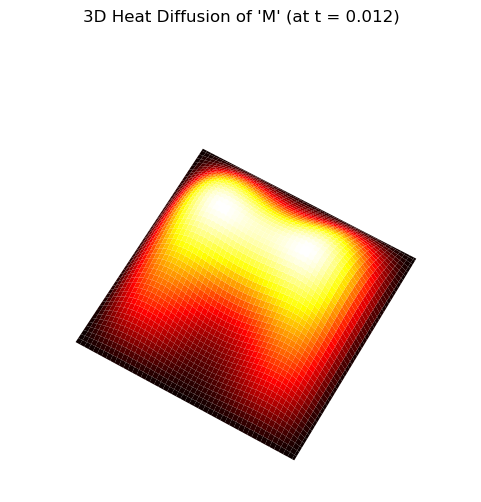

In [5]:
# Expected runtime ~ 4-6 mins

# initial condition
u = M_matrix(40, 40, thickness=12, pad_value=12, m_value=1)

print("Generating animated solution: Diffusion of M shape...")
# plot
fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(111, projection = '3d')
surf = ax.plot_surface(X, Y, u, cmap = "hot")
ax.view_init(elev=65, azim=-60)

ax.set_zlim(0, 1)
ax.set_title("3D Heat Diffusion of 'M'")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("u(x,y,t)")

# explicit scheme
def update(frame):
    global u, surf
    u_new = u.copy()
    u_new[1:-1, 1:-1] = (
        u[1:-1, 1:-1]
        + alpha*dt/dx**2 * (u[2:, 1:-1] - 2*u[1:-1, 1:-1] + u[:-2, 1:-1])
        + alpha*dt/dy**2 * (u[1:-1, 2:] - 2*u[1:-1, 1:-1] + u[1:-1, :-2]) )
    u = u_new

    surf.remove()

    surf = ax.plot_surface(X, Y, u, cmap="hot")
    ax.set_axis_off()
    ax.set_title(f"3D Heat Diffusion of 'M' (at t = {frame*dt:.3f})")
    return [surf]

# animate solution
anim = FuncAnimation(fig, update, frames=timesteps, interval=80, blit=False)
anim.save("diffusion_of_M_shape.gif", writer=PillowWriter(fps=20))

print("Animated solution completed and saved.")
plt.show() 